# Time Series Analysis and the Fourier Transform

## Contents
1. Introduction
    * 1.1 - General Trend
    * 1.2 - Seasonality
    * 1.3 - Stationarity
    * 1.4 - Autocorrelation
2. Fourier Transform
    * 2.1 - How does it work?
    * 2.2 - Why is it useful?
3. Use case: Time Series Classification
4. Toolbox Developlement
5. References


## 1. Introduction
A Time Series is a set of data collected over a period of time at equal intervals, which is then plotted onto a line graph. From this graph, there are various aspects to be indentified that can tell us certain characteristics about the data, such as:

* Its General Trend
* Its Seasonality
* Its Stationarity
* The autocorrelation between observation

Whilst Time Series data can be used to make estimates of the values of values within the time period of the observations, Time Series is most useful when used to extrapolate and predict future values - that of which can be done by anaylsing the aforementioned features of the data.

### 1.1 - General Trend
The General trend of a Time Series refers to the overall change that occurs in the data within the observed time period. For instance, the overall decrease in the manufactute sales volume of icecream in the UK between 2009 and 2018. The general trend of the data usually does not take into account fluctuations between the set time period. 

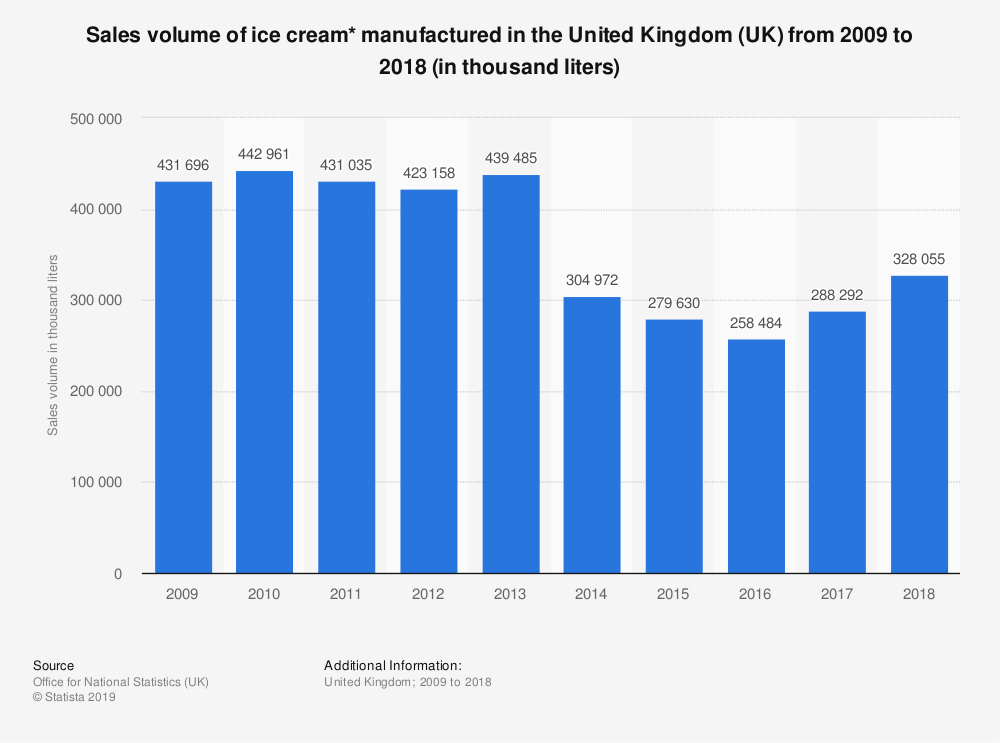

To visualise the general trend of the data, a trend line (which models the data as a polynormial) can be drawn to by calculating the moving average of each cycle and drawing the best fit line for each point. This trend line could also be used to make estimates and predictions, however this approach is quite ignorant as it suggests that the next observation is the mean of the past observations.

There are other options for modelling the data such as exponential smoothing*
, which gives a decreasing weight to data that was collected further from the present, or Seasonal Autoregressive integraded moving averag model (SARIMA)*
, which combines a collection of simple models to create a more complex model that better represents the data.

*
*More info about exponential modelling and SARIMA can be found in the references section*

### 1.2 - Seasonality
Seasonality refers to the seasonal fluctuations in the data. For example, a large increase of ice-cream sales within the summer months and a large dip in sales during winter. 

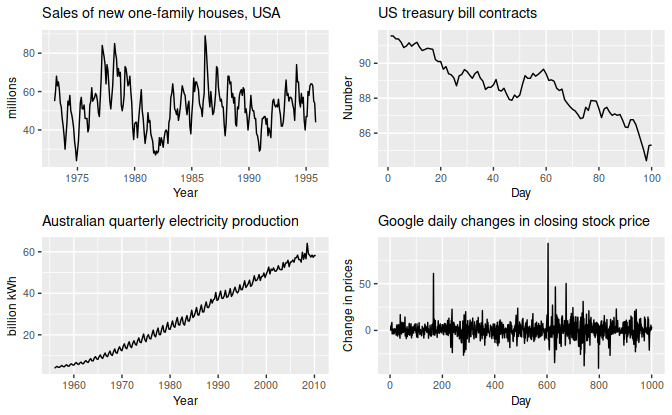


You can measure the seasonality by calculating the seasonal effect of the data using:

**Seasonal Effect = Real Value - Value from Trend Line**

By calculating the average seasonal effect for each point/season in each cycle, you can make predictions for the future values using extrapolations. However, there are clear limitations to doing so, such as how random events or other variables could alter the seasonality of the time series. An example of this could be that after a gradual increase of global tempertures there were increases to the sales of ice-cream during early autumn or late spring. If variables, such as these, are not taken into account, then these predictions become less accurate the further into the future these prediction are made.
 
### 1.3 - Stationarity



### 1.4 - Autocorrelation

## 2. Fourier transform
The Fourier transform is used to tranform a function of time into a function of frequency. This is denoted in the equation:

<img src="attachment:21433ed5-1c9b-4fc8-9f7b-fa1b50f7f01f.png" width=250>
for any real number ξ.


where *x* represents *time*, the transform variable *ξ* represents frequency. f can be determined ![image.png](attachment:31b3b530-6b6c-4391-9a3d-414b7724165a.png) by using the inverse transform:

<img src="attachment:728c6a5b-799e-44c4-b49a-e36debbc79a7.png" width=250>
for any real number x.

Despite changing the type of information being held, each function f and ![image.png](attachment:31b3b530-6b6c-4391-9a3d-414b7724165a.png) represent the same data. Such as how both the IP address and URL can represent the same web page.


### 2.1 - How does it work?
Any continuous signal in the time domain can be represented as represented as the sum of simple sine curves. Since these can be described using only their amplitude, frequency and phase, you can plot the frequency domain representation of the signal by plotting changes in amplitude and phase at given frequencies.

Take this sine wave as an example.
Original: y = sin(10x) and sin(7x)

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
%matplotlib inline

In [79]:
figure(num=None, figsize=(32, 18), dpi=80, facecolor='w', edgecolor='k')

<Figure size 2560x1440 with 0 Axes>

<Figure size 2560x1440 with 0 Axes>

In [110]:
x = np.arange(0, 4*np.pi, 0.1)
y1 = np.sin(15*x)
y2 = np.sin(7*x)

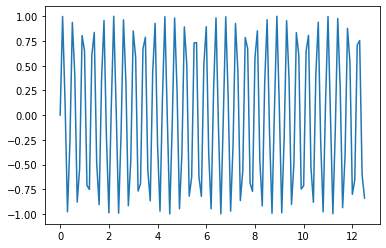

In [111]:
plt.plot(x,y1)
plt.show()

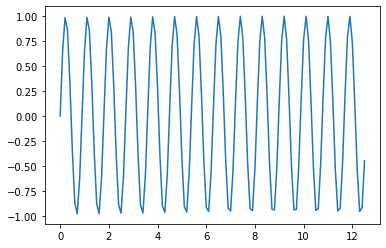

In [112]:
plt.plot(x,y2)
plt.show()

Fourier Transformed Sine Curves:

In [113]:
sp1 = np.fft.fft(y1)
sp2 = np.fft.fft(y2)
freq = np.fft.fftfreq(x.shape[-1])

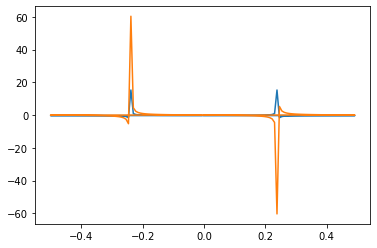

In [114]:
plt.plot(freq, sp1.real, freq, sp1.imag)
plt.show()

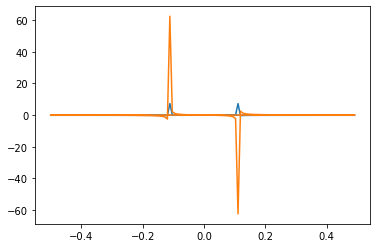

In [115]:
plt.plot(freq, sp2.real, freq, sp2.imag)
plt.show()

When we performed the fourier transform on this wave, we see a "spikes" form at certain frequencies. These frequencies correspond to the frequency of the original sine wave that was tranformed. You could also revert it back using the inverse function.

Additionally, when we superimpose multiple these waveforms, they waves can interfere constructively or destructively. This alters the shape of these waves. However, when we then apply the fourier transform to these impure waveforms, the frequencies of their constituent waveforms still form peaks.

In [120]:
a = np.arange(0, 4*np.pi, 0.1)
b = np.sin(15*x)+np.sin(7*x)

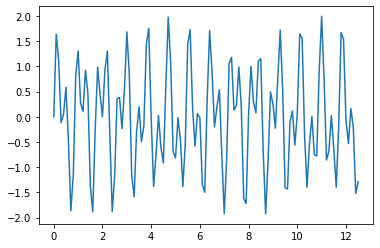

In [121]:
plt.plot(a,b)
plt.show()

In [122]:
impure_sp = np.fft.fft(b)
impure_freq = np.fft.fftfreq(x.shape[-1])

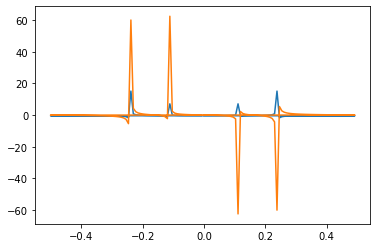

In [123]:
plt.plot(impure_freq, impure_sp.real, impure_freq, impure_sp.imag)
plt.show()

### 2.2 - Why is this useful?
This tranform is very useful as it allows us to decompose impure waveforms and edit them accordingly, in conjunction with the inverse transform. For example, in sound editing, a high frequency within an audio file can be easily identified and altered after transforming the sound wave using the fourier transform.

## 3. Use case: time series classification

* discuss application of Fourier transform 
* explain time series classification

In [27]:
from scipy.fft import fft, ifft
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Data set
* fault detection based on engine noise
* FordA data set: http://timeseriesclassification.com/description.php?Dataset=FordA

In [1]:
from utils import load_data
X_train, X_test, y_train, y_test = load_data()

ModuleNotFoundError: No module named 'sktime'

### Problem statement: time series classification
* what is the problem we are trying to solve, time series classification

### Methodology
* how do we want to solve it, i.e. using the Fourier transform

### Results
* discuss results
* visualise results

## 4. Toolbox development
* write code for re-usable Fourier transform function using object-oriented programming
* use together with sktime, scikit-learn and pipelining

## References
* add links to papers/useful resources (e.g. Fourier video)

In [3]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/spUNpyF58BY?rel=0&amp;controls=0&amp;showinfo=0", width=560, height=315)

Almost Everything You Need to Know About Time Series - https://towardsdatascience.com/almost-everything-you-need-to-know-about-time-series-860241bdc578
A Gentle Introduction to Exponential Smoothing for Time Series Forecasting in Python - https://machinelearningmastery.com/exponential-smoothing-for-time-series-forecasting-in-python/
A Gentle Introduction to SARIMA for Time Series Forecasting in Python - https://machinelearningmastery.com/sarima-for-time-series-forecasting-in-python/